# Order Delivery Time Prediction

Author: VamsiKishna Koundinya Nandigama<br>
Project: Linear Regression Assignment - Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [58]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [59]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

# Display the first few rows of the DataFrame
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [60]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (175777, 14)


In [61]:
# Display the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

**Observations:**
1. created_at, actual_delivery_time are date fields and their data types need to be changed.
2. market_id, order_protocol should be integer data type instead of float. This need to be changed.
3. Need to check if negative values exists in any of the columns and deal with them.
4. There are no null or missing values.

In [62]:
# Display the summary statistics of the DataFrame
print("Summary statistics")
df.describe().T

Summary statistics


count         mean          std   min      25%  \
market_id                 175777.0     2.743726     1.330963   1.0     2.00   
store_primary_category    175777.0    35.887949    20.728254   0.0    18.00   
order_protocol            175777.0     2.911752     1.513128   1.0     1.00   
total_items               175777.0     3.204976     2.674055   1.0     2.00   
subtotal                  175777.0  2697.111147  1828.554893   0.0  1412.00   
num_distinct_items        175777.0     2.675060     1.625681   1.0     1.00   
min_item_price            175777.0   684.965433   519.882924 -86.0   299.00   
max_item_price            175777.0  1160.158616   560.828571   0.0   799.00   
total_onshift_dashers     175777.0    44.918664    34.544724  -4.0    17.00   
total_busy_dashers        175777.0    41.861381    32.168505  -5.0    15.00   
total_outstanding_orders  175777.0    58.230115    52.731043  -6.0    17.00   
distance                  175777.0    21.843090     8.748712   0.0    15.36   

                              50%      75%       max  
market_id                    2.00     4.00      6.00  
store_primary_category      38.00    55.00     72.00  
order_protocol               3.00     4.00      7.00  
total_items                  3.00     4.00    411.00  
subtotal                  2224.00  3410.00  26800.00  
num_distinct_items           2.00     3.00     20.00  
min_item_price             595.00   942.00  14700.00  
max_item_price            1095.00  1395.00  14700.00  
total_onshift_dashers       37.00    66.00    171.00  
total_busy_dashers          35.00    63.00    154.00  
total_outstanding_orders    41.00    85.00    285.00  
distance                    21.76    28.12     83.52

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [63]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Check data types after fixing the date columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [64]:
# Convert categorical features to category type

cat_columns = ['market_id','store_primary_category', 'order_protocol']
df[cat_columns] = df[cat_columns].astype('category')

In [65]:
# Check data types after fixing the date columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [66]:
# Calculate time taken in minutes
df['delivery_time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [67]:
# Extract the hour and day of week from the 'created_at' timestamp
df['delivery_hour'] = df['created_at'].dt.hour
df['delivery_day_of_week'] = df['created_at'].dt.dayofweek

# Convert 'delivery_day_of_week' to a categorical type
df['delivery_day_of_week'] = df['delivery_day_of_week'].astype('int64')

# Create a categorical feature 'isWeekend'
df['is_weekend'] = df['delivery_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [68]:
# Drop unnecessary columns
df.drop(['market_id','actual_delivery_time'], axis=1, inplace=True)

In [69]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   created_at                175777 non-null  datetime64[ns]
 1   store_primary_category    175777 non-null  category      
 2   order_protocol            175777 non-null  category      
 3   total_items               175777 non-null  int64         
 4   subtotal                  175777 non-null  int64         
 5   num_distinct_items        175777 non-null  int64         
 6   min_item_price            175777 non-null  int64         
 7   max_item_price            175777 non-null  int64         
 8   total_onshift_dashers     175777 non-null  float64       
 9   total_busy_dashers        175777 non-null  float64       
 10  total_outstanding_orders  175777 non-null  float64       
 11  distance                  175777 non-null  float64       
 12  de

In [70]:
df.head()

created_at store_primary_category order_protocol  total_items  \
0 2015-02-06 22:24:17                      4            1.0            4   
1 2015-02-10 21:49:25                     46            2.0            1   
2 2015-02-16 00:11:35                     36            3.0            4   
3 2015-02-12 03:36:46                     38            1.0            1   
4 2015-01-27 02:12:36                     38            1.0            2   

   subtotal  num_distinct_items  min_item_price  max_item_price  \
0      3441                   4             557            1239   
1      1900                   1            1400            1400   
2      4771                   3             820            1604   
3      1525                   1            1525            1525   
4      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance  delivery_time_taken  delivery_hour  delivery_day_of_week  \
0     34.44                 47.0             22                     4   
1     27.60                 44.0             21                     1   
2     11.56                 55.0              0                     0   
3     31.80                 59.0              3                     3   
4      8.20                 46.0              2                     1   

   is_weekend  
0           0  
1           0  
2           0  
3           0  
4           0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [71]:
# Define target variable (y) and features (X)
X = df.drop(['delivery_time_taken'], axis=1)
y = df['delivery_time_taken']

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (175777, 15)
Shape of y: (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (140621, 15)
Shape of X_test: (35156, 15)
Shape of y_train: (140621,)
Shape of y_test: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [73]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = X.select_dtypes(include=['int64', 'int32', 'float64']).columns
category_cols = X.select_dtypes(include=['category']).columns

# Print numerical columns
print("Numerical columns:", num_cols)

# Print categorical columns
print("Categorical columns:", category_cols)


Numerical columns: Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_hour',
       'delivery_day_of_week', 'is_weekend'],
      dtype='object')
Categorical columns: Index(['store_primary_category', 'order_protocol'], dtype='object')


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

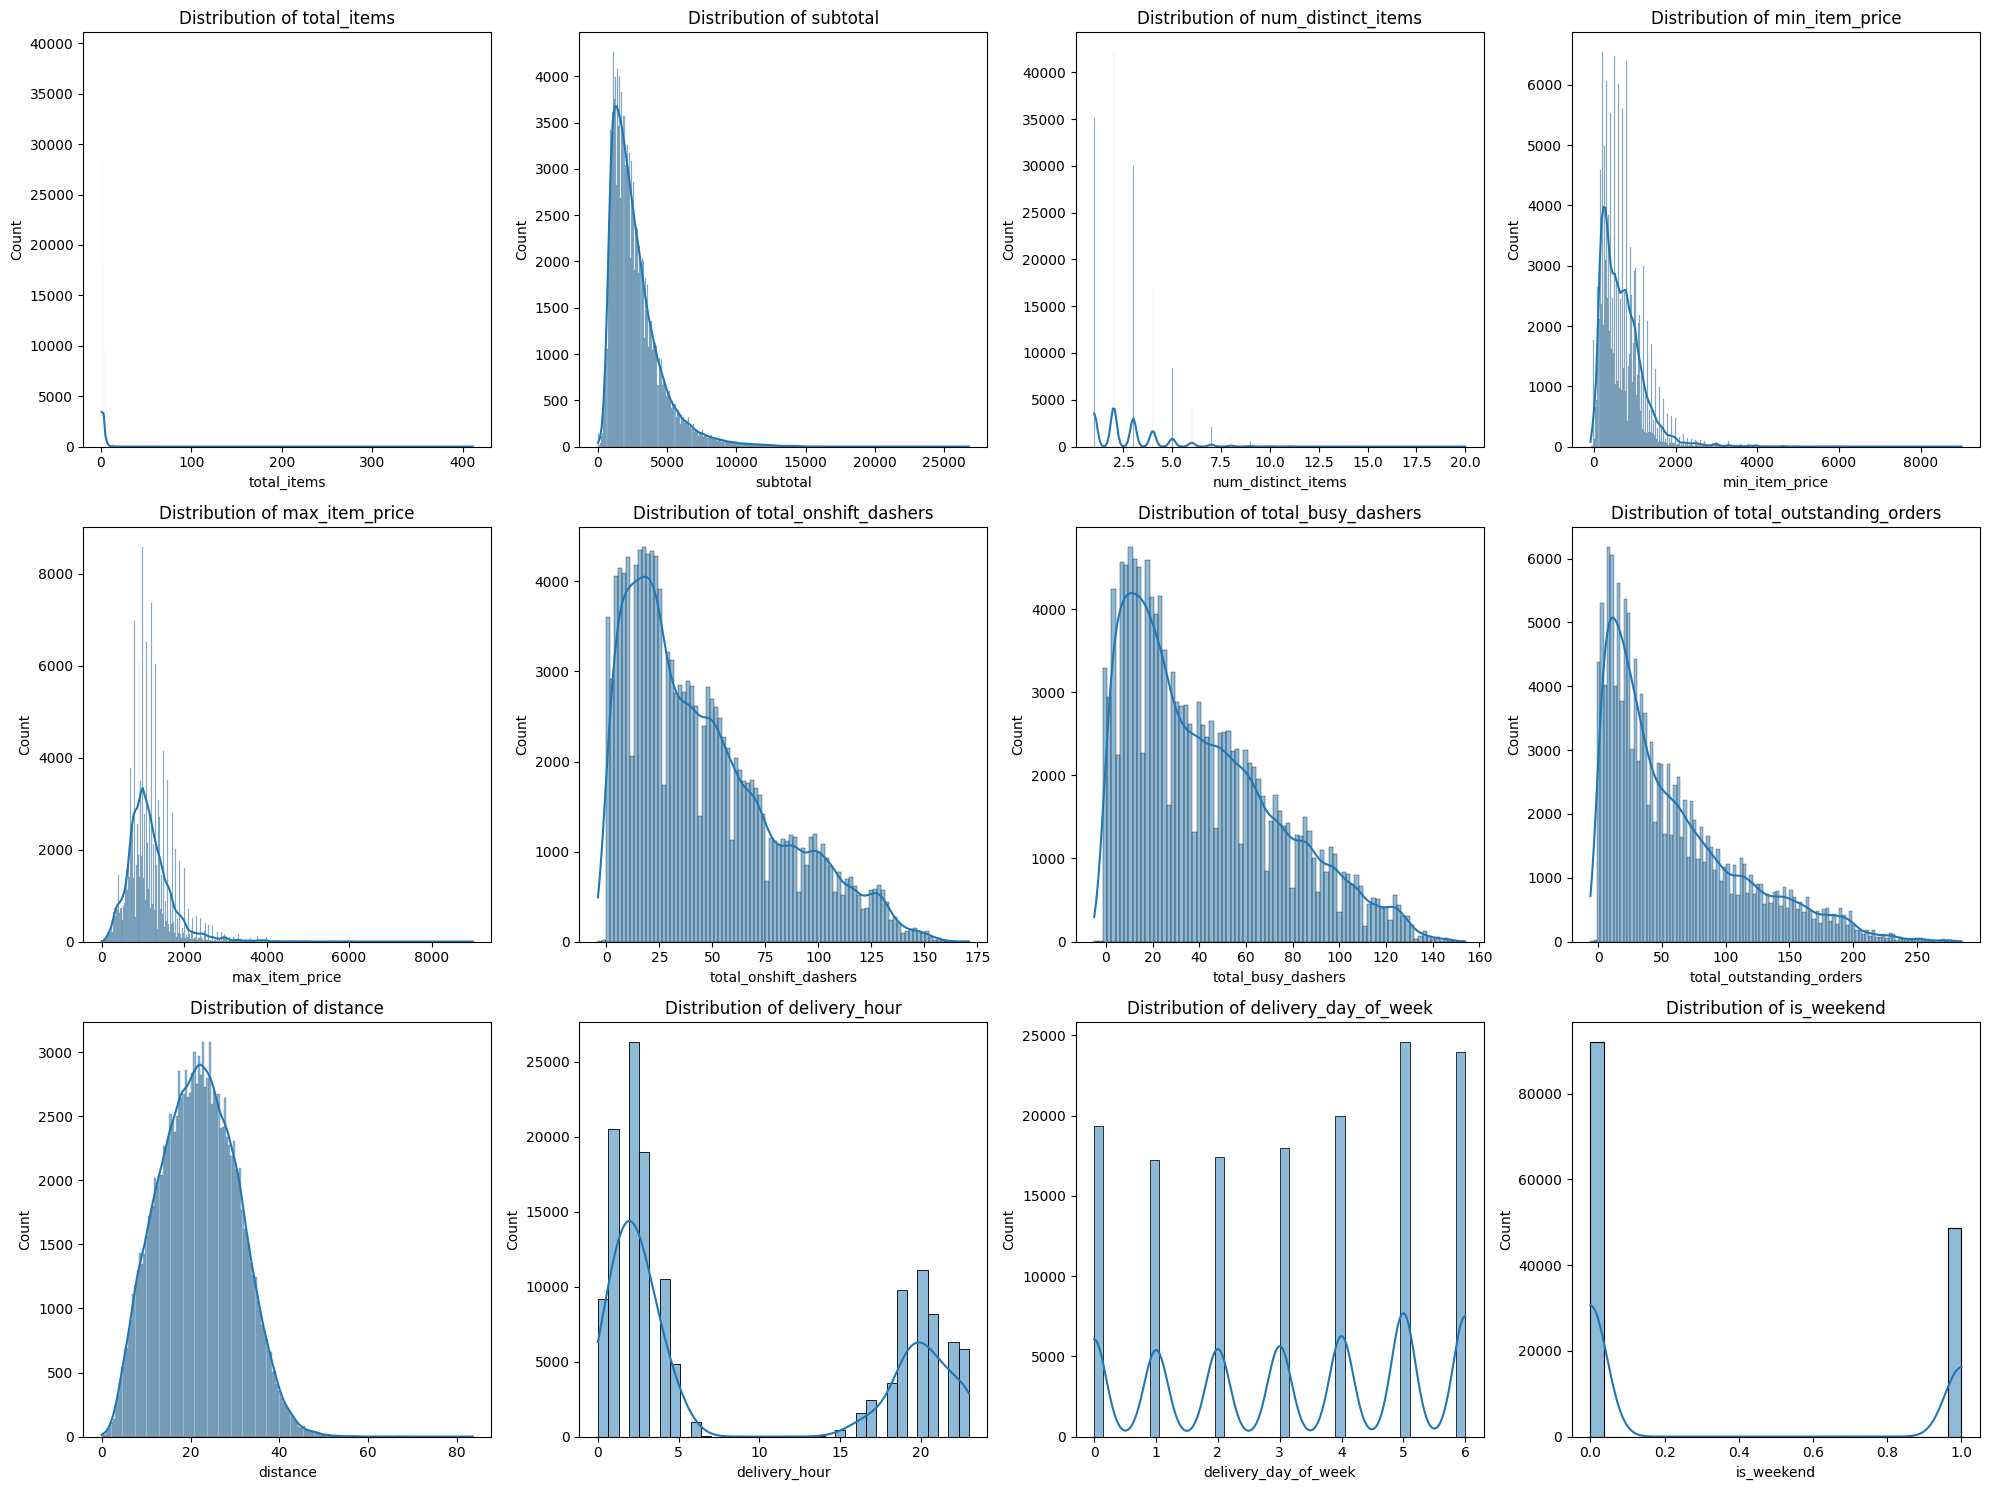

In [74]:
# Plot distributions for all numerical columns in the training set
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

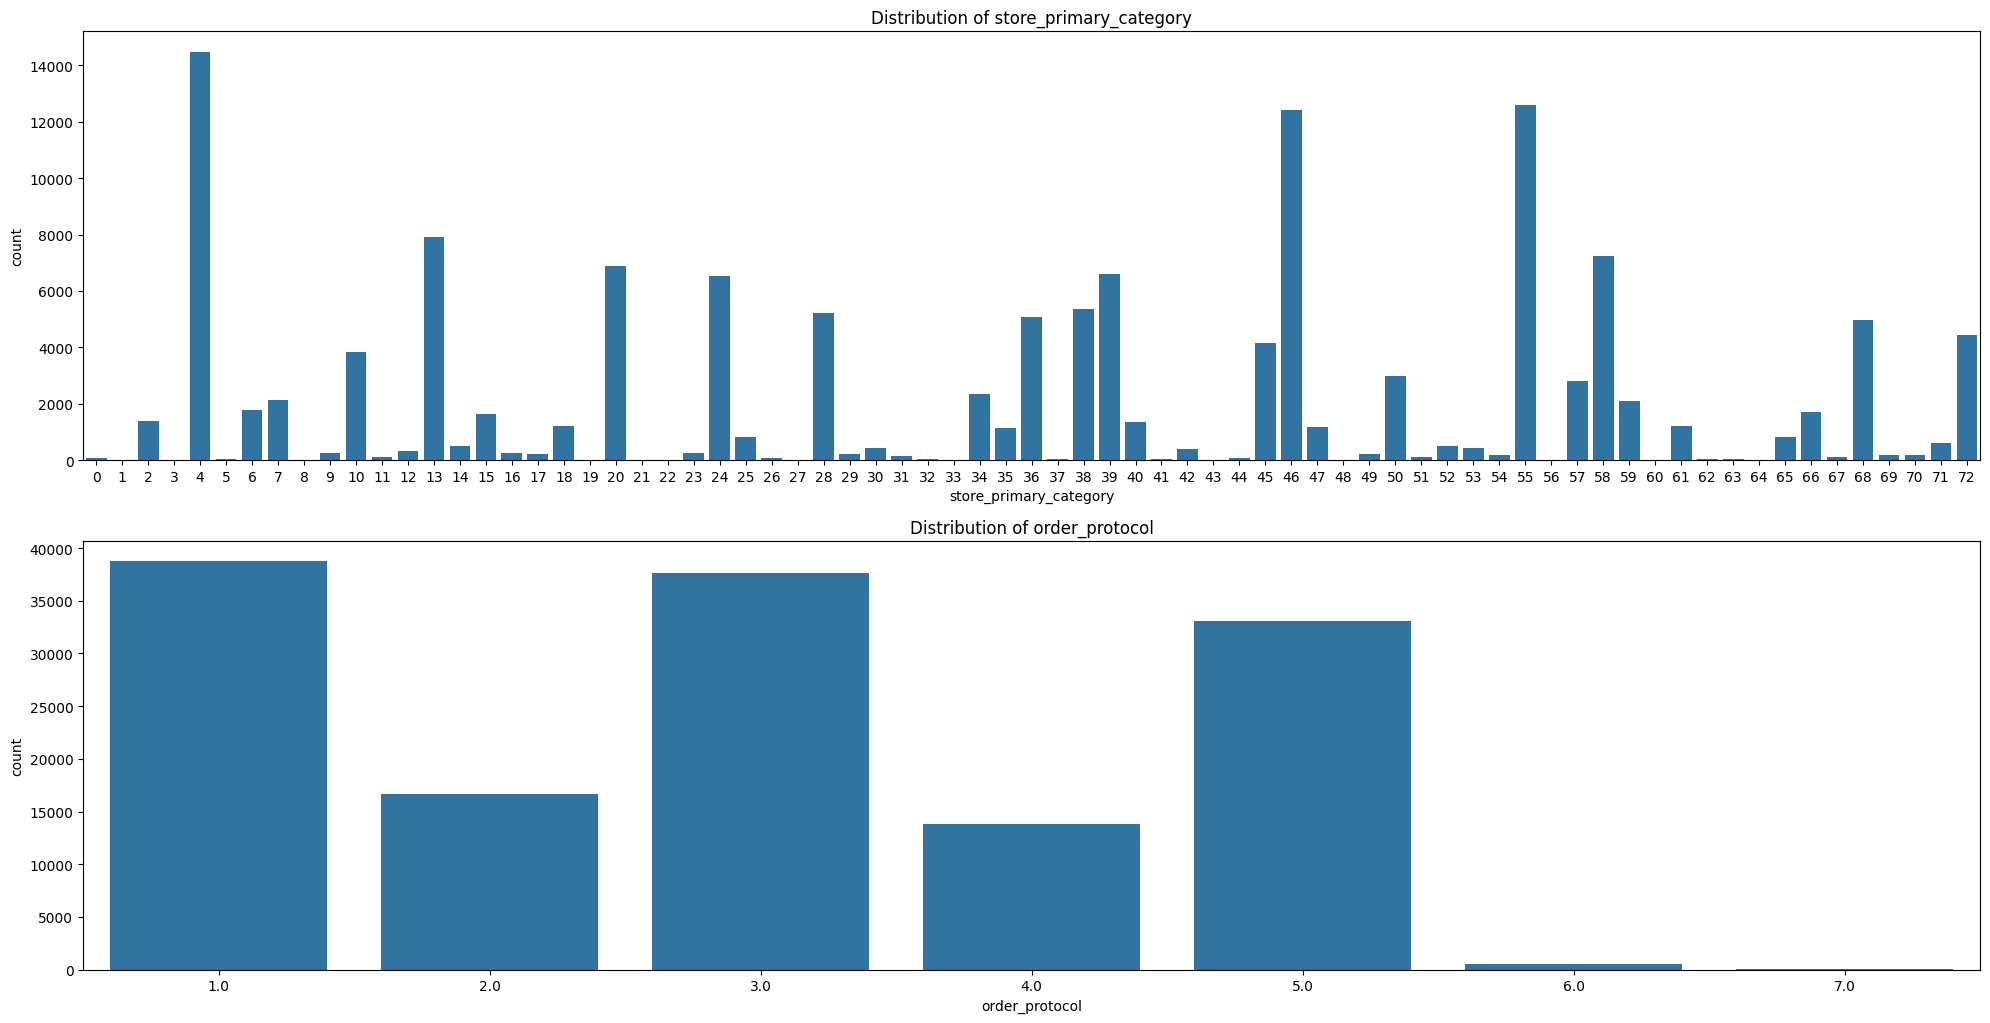

In [75]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(category_cols):
    plt.subplot(3, 1, i + 1)
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

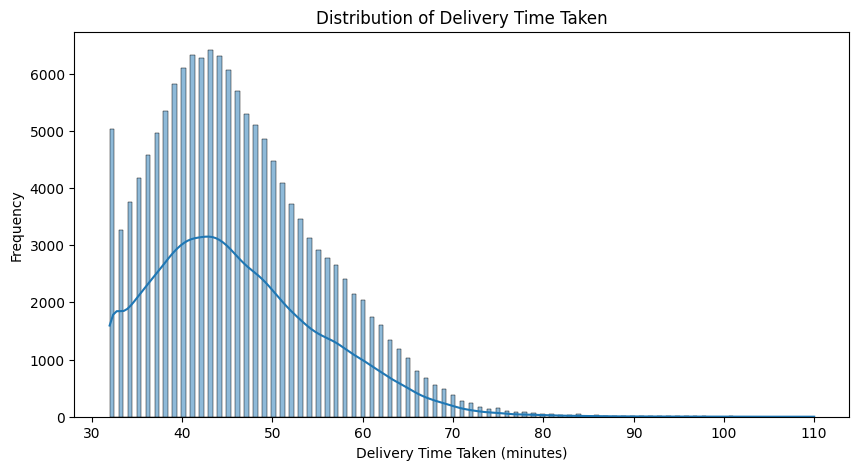

In [76]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Delivery Time Taken')
plt.xlabel('Delivery Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

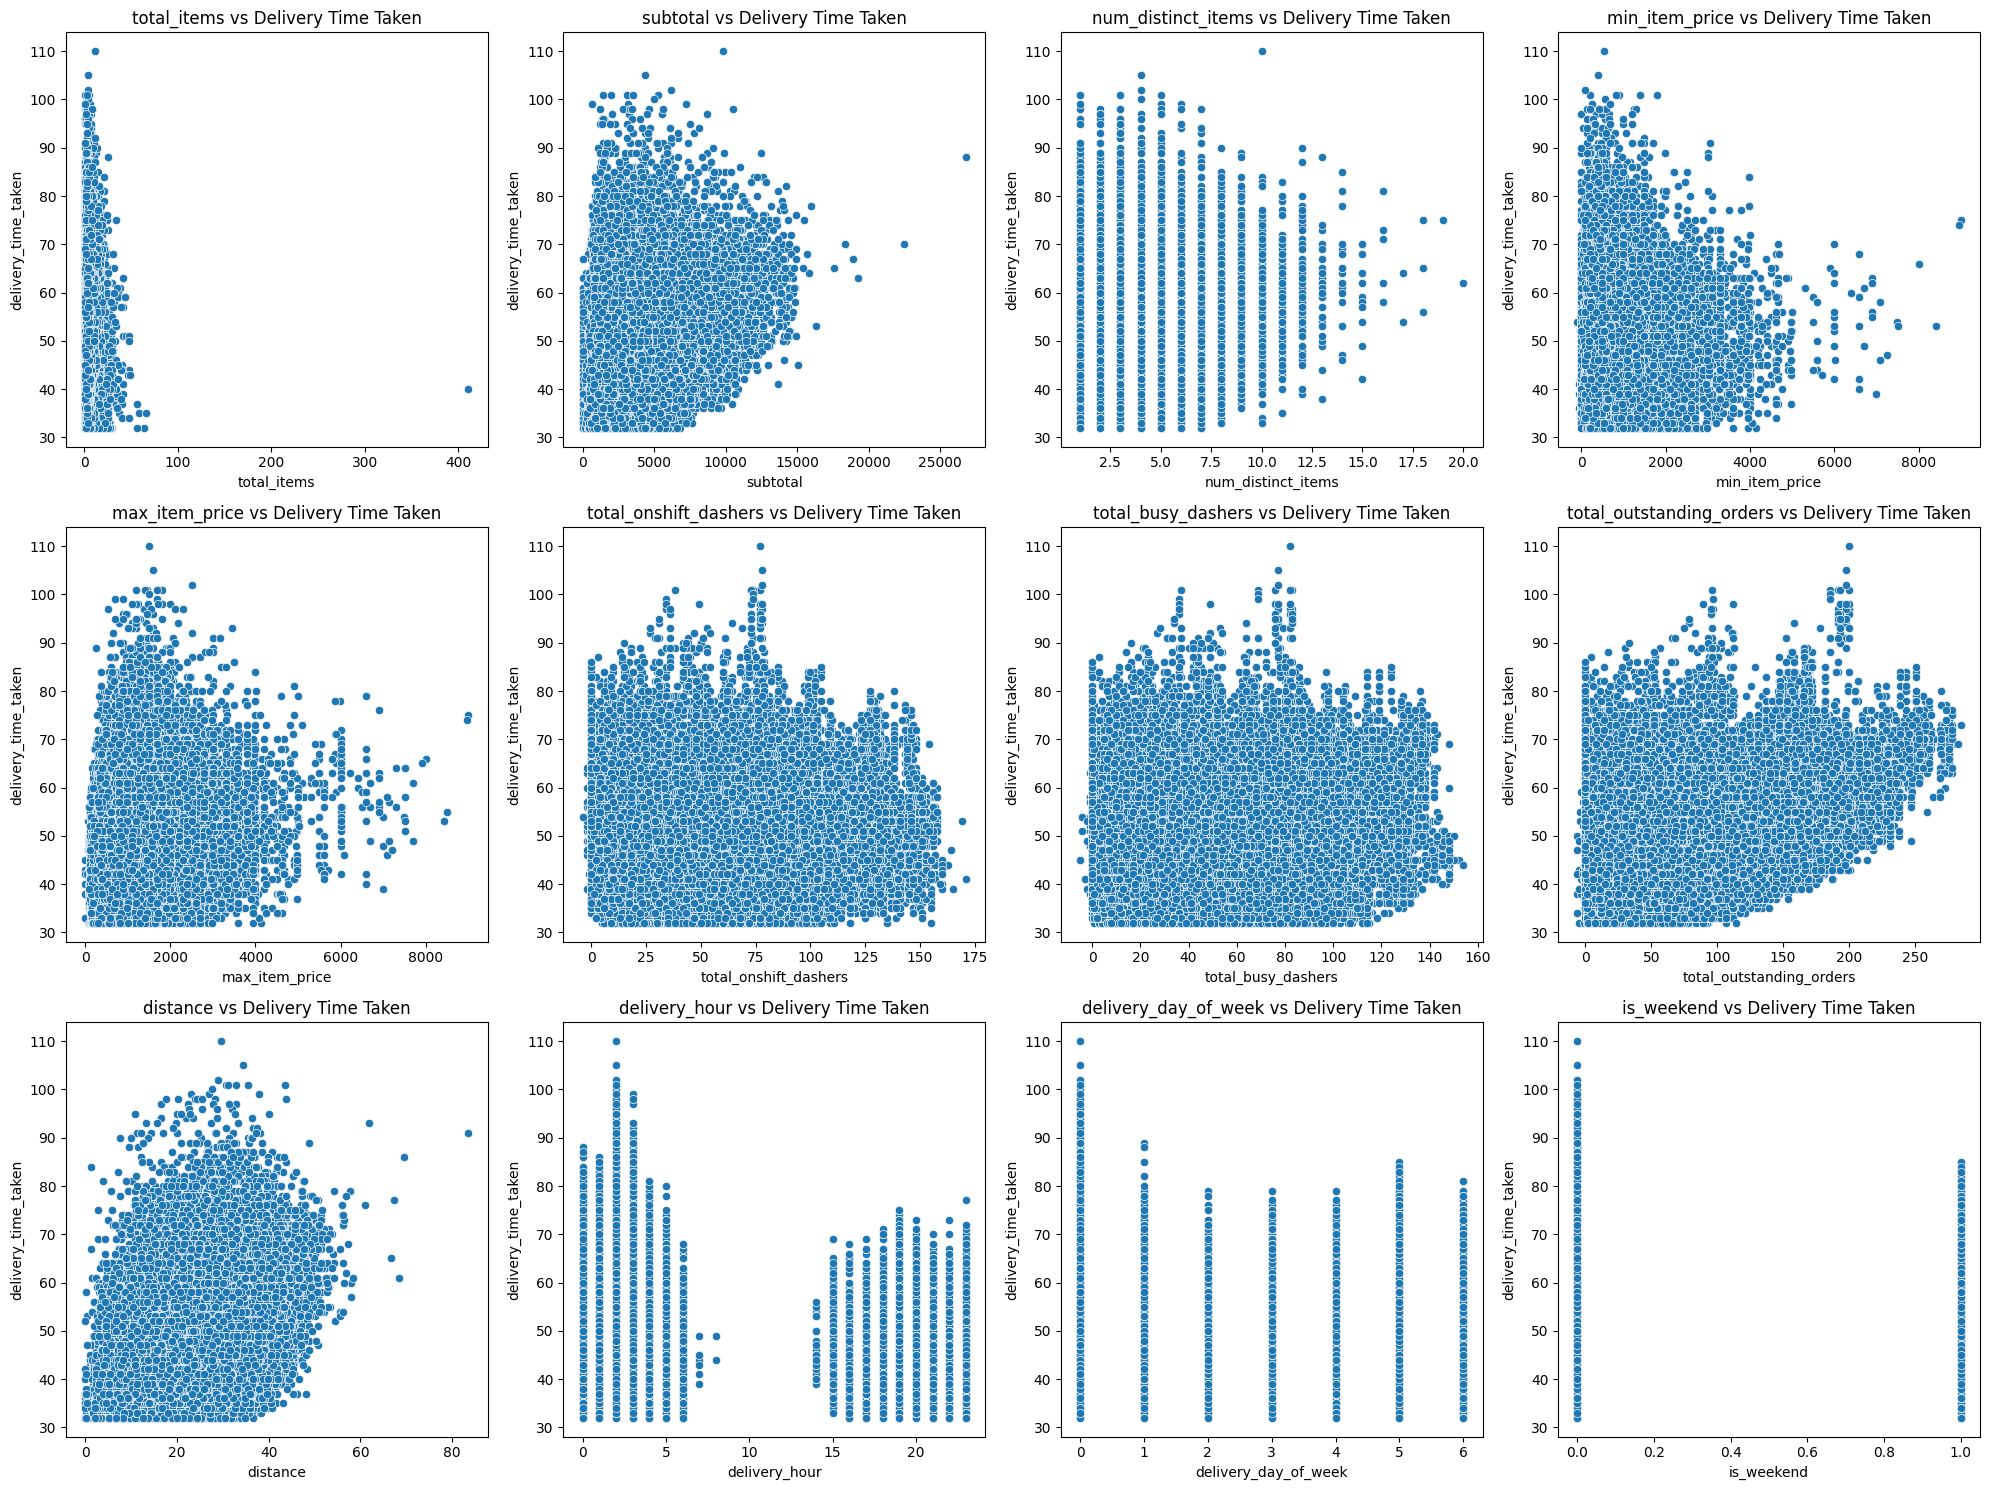

In [77]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(data=X_train, x=col, y=y_train)
    plt.title(f'{col} vs Delivery Time Taken')
plt.tight_layout()
plt.show()


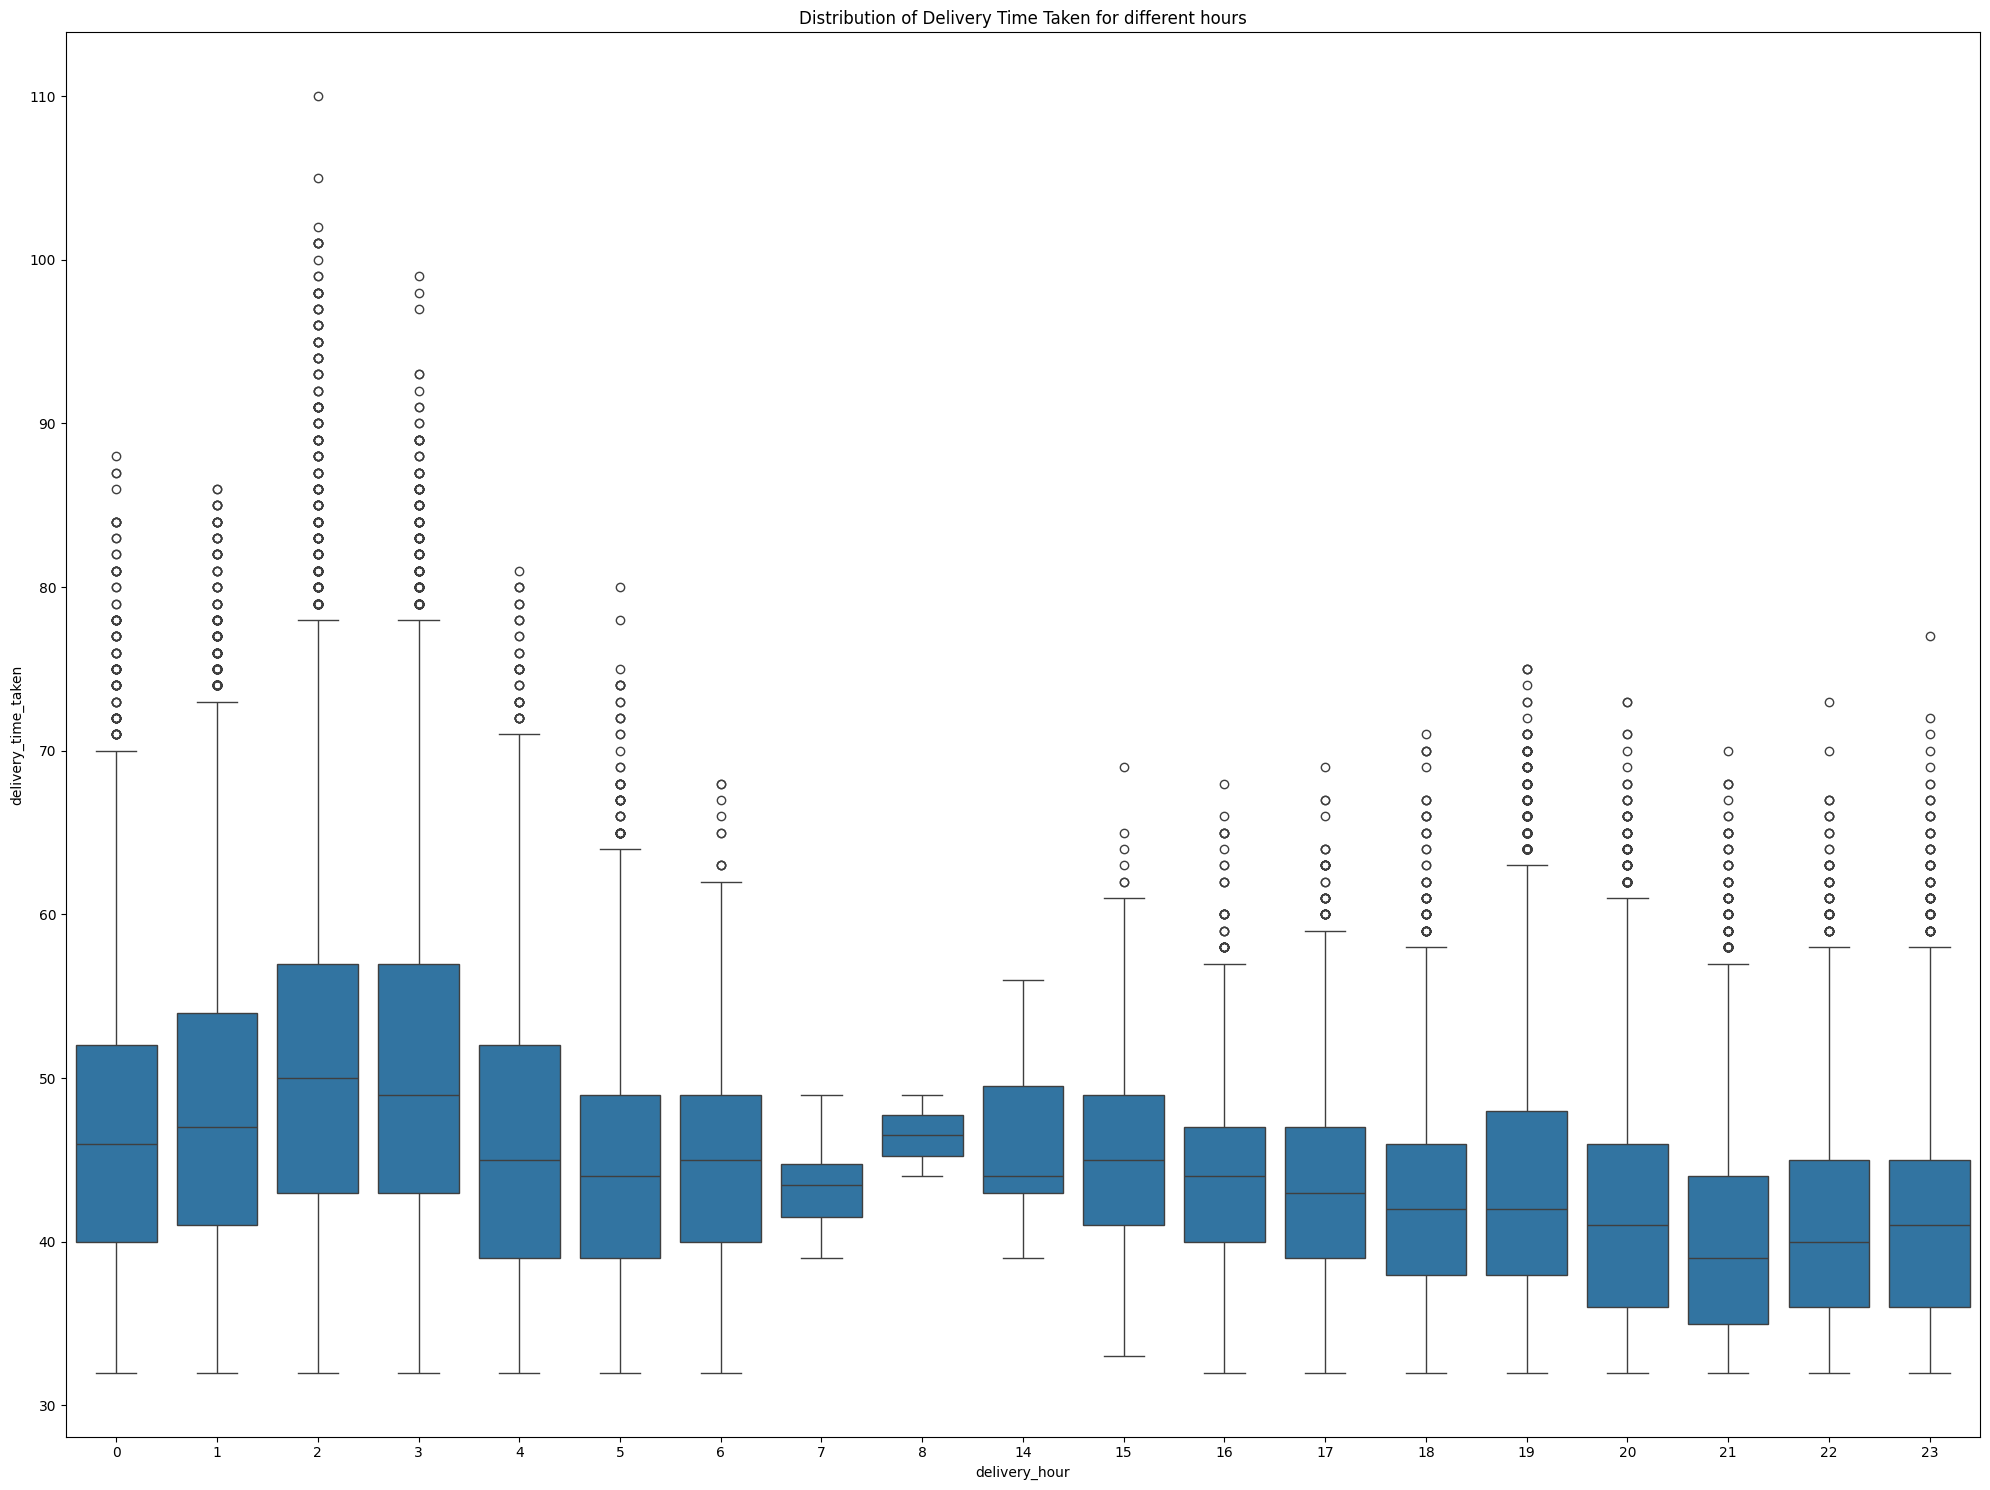

In [78]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train, x=X_train['delivery_hour'], y=y_train)
plt.title(f'Distribution of Delivery Time Taken for different hours')
plt.tight_layout()
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

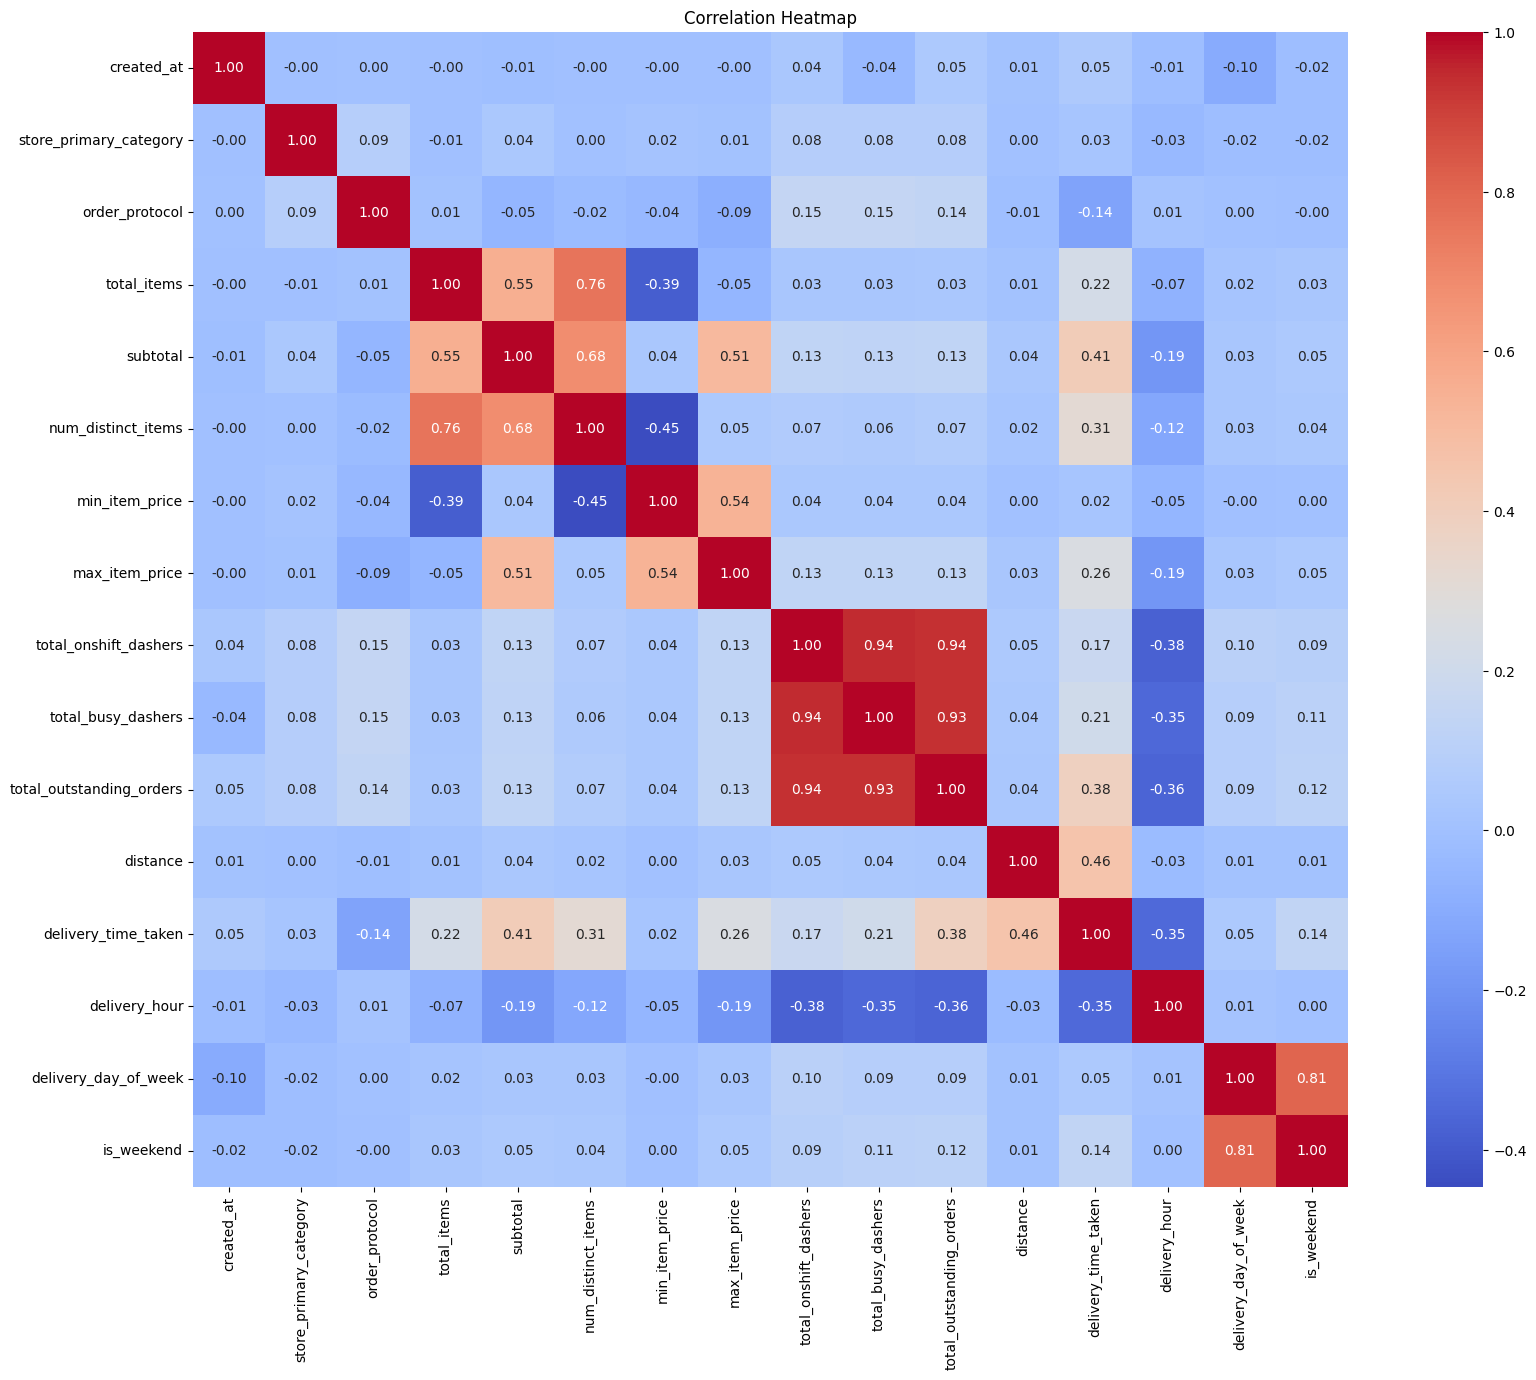

In [81]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [82]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.drop(['store_primary_category', 'order_protocol','created_at'], axis=1, inplace=True)
X_test.drop(['store_primary_category', 'order_protocol','created_at'], axis=1, inplace=True)

# Check the shape of the training and testing sets after dropping columns
print("Shape of X_train after dropping columns:", X_train.shape)
print("Shape of X_test after dropping columns:", X_test.shape)

# Check the info of the training set
X_train.info()

# Check the info of the testing set
X_test.info()


Shape of X_train after dropping columns: (140621, 12)
Shape of X_test after dropping columns: (35156, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               140621 non-null  int64  
 1   subtotal                  140621 non-null  int64  
 2   num_distinct_items        140621 non-null  int64  
 3   min_item_price            140621 non-null  int64  
 4   max_item_price            140621 non-null  int64  
 5   total_onshift_dashers     140621 non-null  float64
 6   total_busy_dashers        140621 non-null  float64
 7   total_outstanding_orders  140621 non-null  float64
 8   distance                  140621 non-null  float64
 9   delivery_hour             140621 non-null  int32  
 10  delivery_day_of_week      140621 non-null  int64  
 11  is_weekend                140621 non-null  int64  

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

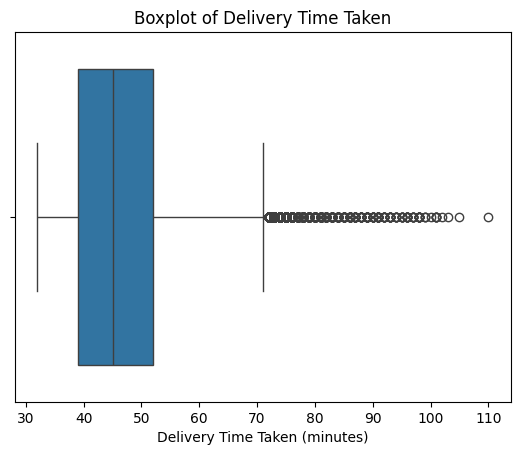

Lower bound for outliers: 19.5
Upper bound for outliers: 71.5


In [85]:
# Boxplot for time_taken
sns.boxplot(data=df, x='delivery_time_taken')
plt.title('Boxplot of Delivery Time Taken')
plt.xlabel('Delivery Time Taken (minutes)')
plt.show()

# Check for outliers in the target variable
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [86]:
# Handle outliers

# Remove outliers from the training set
X_train = X_train[(y_train >= lower_bound) & (y_train <= upper_bound)]
y_train = y_train[(y_train >= lower_bound) & (y_train <= upper_bound)]

# Check the shape of the training set after removing outliers
print("Shape of X_train after removing outliers:", X_train.shape)
print("Shape of y_train after removing outliers:", y_train.shape)


Shape of X_train after removing outliers: (139242, 12)
Shape of y_train after removing outliers: (139242,)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [87]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [88]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [90]:
# Check the scaled data
X_train.head()

total_items  subtotal  num_distinct_items  min_item_price  \
102712    -0.808240 -1.029658           -1.033363        0.117522   
94576     -0.808240 -0.932697           -1.033363        0.600722   
49784      0.297879 -0.353699            0.831125       -1.032496   
37753     -0.439534 -0.167533           -0.411867       -0.203324   
91728     -0.808240 -0.691678           -1.033363        1.228883   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712       -0.739917              -0.284235           -0.085232   
94576        -0.290187               1.887906            0.941811   
49784        -0.470079              -1.124130           -1.205642   
37753         0.436576              -0.834511           -0.769927   
91728         0.294461               0.555660            0.163748   

        total_outstanding_orders  distance  delivery_hour  \
102712                 -0.032035  0.981859       1.433161   
94576                   1.117776  1.078283      -0.751841   
49784                  -0.971047 -0.413988       1.433161   
37753                  -0.741085  1.340004      -0.636841   
91728                  -0.108689  1.124199       1.433161   

        delivery_day_of_week  is_weekend  
102712             -1.101037   -0.728471  
94576               0.373392   -0.728471  
49784               0.373392   -0.728471  
37753              -1.101037   -0.728471  
91728               0.373392   -0.728471

In [91]:
X_test.head()

total_items  subtotal  num_distinct_items  min_item_price  \
50609     0.297879 -0.045639            0.831125       -0.744508   
49181    -0.070827  0.277935           -0.411867       -0.201391   
4526     -0.808240 -0.819667           -1.033363        0.995014   
131       0.666585 -0.603028            0.831125       -0.935856   
57096     1.035291  0.554967            0.209629       -0.452655   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
50609       -0.103100               0.295003            0.319361   
49181        0.258483               1.627249            1.750996   
4526         0.076792              -1.095168           -1.112274   
131         -1.288587              -1.211015           -1.174519   
57096       -0.730922              -1.037244           -1.267887   

       total_outstanding_orders  distance  delivery_hour  \
50609                  0.159600  0.752279      -0.751841   
49181                  2.574203  0.205878      -0.751841   
4526                  -0.990211 -0.822640      -0.406841   
131                   -1.028538  0.444642       1.548161   
57096                 -1.086028 -0.652751       1.203161   

       delivery_day_of_week  is_weekend  
50609             -0.609561   -0.728471  
49181             -1.592513   -0.728471  
4526               0.373392   -0.728471  
131               -0.609561   -0.728471  
57096              1.356344    1.372738

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [92]:
# Create/Initialise the model
model = LinearRegression()


In [93]:
# Train the model using the training data
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# Make predictions
model_predictions = model.predict(X_test)

# Check the first 10 predictions
print("First 10 predictions:", model_predictions[:10])

# Check the first 10 actual values
print("First 10 actual values:", y_test[:10])

First 10 predictions: [48.35839495 65.76250849 41.33959243 44.58873256 41.78932563 28.75732943
 34.30506507 43.65412135 32.77107427 46.98933229]
First 10 actual values: 50609     50.0
49181     69.0
4526      41.0
131       45.0
57096     40.0
114801    36.0
72284     34.0
171774    43.0
83830     32.0
33555     46.0
Name: delivery_time_taken, dtype: float64


In [95]:
# Find results for evaluation metrics
model_mse = mean_squared_error(y_test, model_predictions)
model_rmse = np.sqrt(model_mse)
model_r2 = r2_score(y_test, model_predictions)
model_mae = mean_absolute_error(y_test, model_predictions)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", model_mse)
print("Root Mean Squared Error (RMSE):", model_rmse)
print("R-squared (R2):", model_r2)
print("Mean Absolute Error (MAE):", model_mae)

# Plot the predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, model_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Delivery Time Taken (minutes)')
plt.ylabel('Predicted Delivery Time Taken (minutes)')
plt.title('Predicted vs Actual Delivery Time Taken')
plt.show()


Model Evaluation Metrics:
Mean Squared Error (MSE): 12.106852282582421
Root Mean Squared Error (RMSE): 3.479490233149451
R-squared (R2): 0.8616791048608344
Mean Absolute Error (MAE): 2.4948239300237876


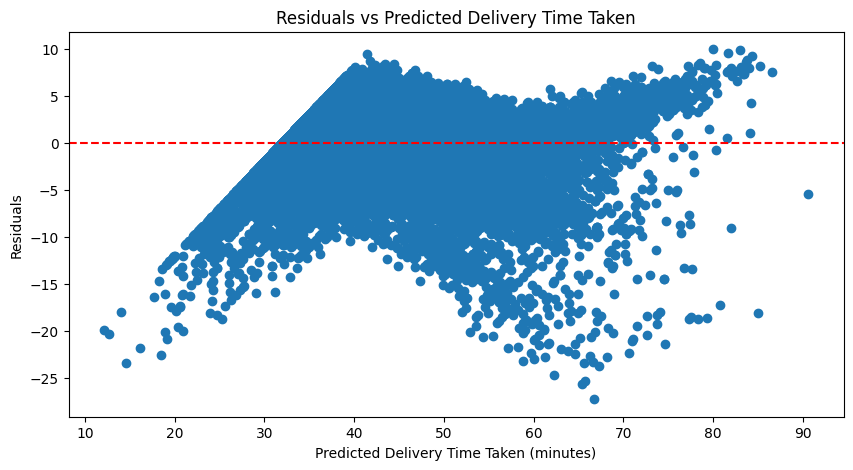

In [96]:
# Plot the residuals
plt.figure(figsize=(10, 5))
plt.scatter(model_predictions, model_predictions - y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Delivery Time Taken (minutes)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Delivery Time Taken')
plt.show()

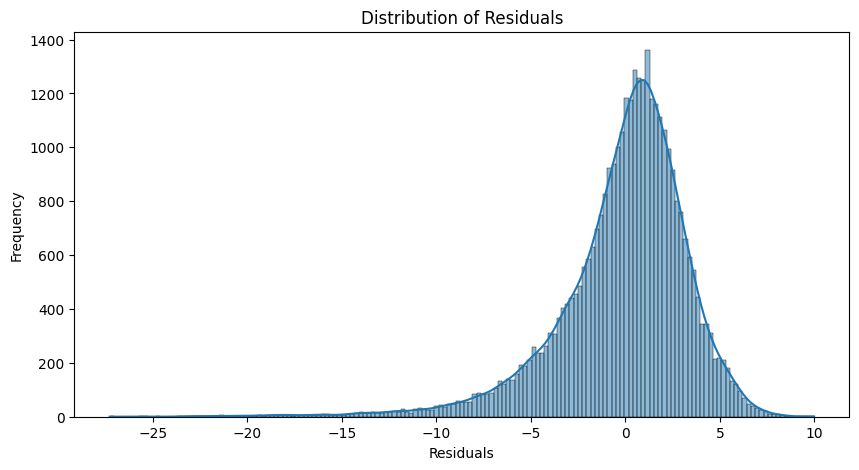

In [97]:
# Plot the distribution of residuals
plt.figure(figsize=(10, 5))
sns.histplot(model_predictions - y_test, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [99]:
# Import libraries for feature selection
from sklearn.feature_selection import RFE

# Loop through the number of features and test the model
for i in range(1, len(X_train.columns) + 1):
    # Create the RFE model and select the top i features
    rfe = RFE(model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)

    # Get the selected features
    selected_features = X_train.columns[rfe.support_]

    # Train the model using the selected features
    model.fit(X_train[selected_features], y_train)

    # Make predictions
    model_predictions = model.predict(X_test[selected_features])

    # Find results for evaluation metrics
    model_mse = mean_squared_error(y_test, model_predictions)
    model_rmse = np.sqrt(model_mse)
    model_r2 = r2_score(y_test, model_predictions)
    model_mae = mean_absolute_error(y_test, model_predictions)

    # Print the evaluation metrics
    print(f"\nModel Evaluation Metrics with {i} features:")
    print("Mean Squared Error (MSE):", model_mse)
    print("Root Mean Squared Error (RMSE):", model_rmse)
    print("R-squared (R2):", model_r2)
    print("Mean Absolute Error (MAE):", model_mae)


Model Evaluation Metrics with 1 features:
Mean Squared Error (MSE): 74.72257621920751
Root Mean Squared Error (RMSE): 8.644222129214839
R-squared (R2): 0.1462939012963096
Mean Absolute Error (MAE): 6.878117117630421

Model Evaluation Metrics with 2 features:
Mean Squared Error (MSE): 48.93005535621835
Root Mean Squared Error (RMSE): 6.995002169850868
R-squared (R2): 0.44097368183653074
Mean Absolute Error (MAE): 5.4803513118041245

Model Evaluation Metrics with 3 features:
Mean Squared Error (MSE): 46.85376081816007
Root Mean Squared Error (RMSE): 6.844980702541101
R-squared (R2): 0.4646953654231023
Mean Absolute Error (MAE): 5.365875449248904

Model Evaluation Metrics with 4 features:
Mean Squared Error (MSE): 28.656994242097333
Root Mean Squared Error (RMSE): 5.353222790254234
R-squared (R2): 0.6725935855955356
Mean Absolute Error (MAE): 4.1294067474411325

Model Evaluation Metrics with 5 features:
Mean Squared Error (MSE): 16.964055789889077
Root Mean Squared Error (RMSE): 4.118744

**Key Observations:**
- From 1 to 6 features: Substantial improvements across all metrics.
- From 6 to 9 features: Gains continue but taper off.
- From 10 to 12 features: The performance gain becomes marginal, indicating diminishing returns.

Recommended choice is to go with 6 or 7 features.

In [101]:
# Build the final model with selected number of features
model = LinearRegression()

# Train the model using the training data
model.fit(X_train[selected_features], y_train)

# Make predictions
model_predictions = model.predict(X_test[selected_features])

# Find results for evaluation metrics
model_mse = mean_squared_error(y_test, model_predictions)
model_rmse = np.sqrt(model_mse)
model_r2 = r2_score(y_test, model_predictions)
model_mae = mean_absolute_error(y_test, model_predictions)

# Print the evaluation metrics
print("\nFinal Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", model_mse)
print("Root Mean Squared Error (RMSE):", model_rmse)
print("R-squared (R2):", model_r2)
print("Mean Absolute Error (MAE):", model_mae)

# Plot the predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, model_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Delivery Time Taken (minutes)')
plt.ylabel('Predicted Delivery Time Taken (minutes)')
plt.title('Predicted vs Actual Delivery Time Taken')
plt.show()



Final Model Evaluation Metrics:
Mean Squared Error (MSE): 12.106852282582421
Root Mean Squared Error (RMSE): 3.479490233149451
R-squared (R2): 0.8616791048608344
Mean Absolute Error (MAE): 2.4948239300237876


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

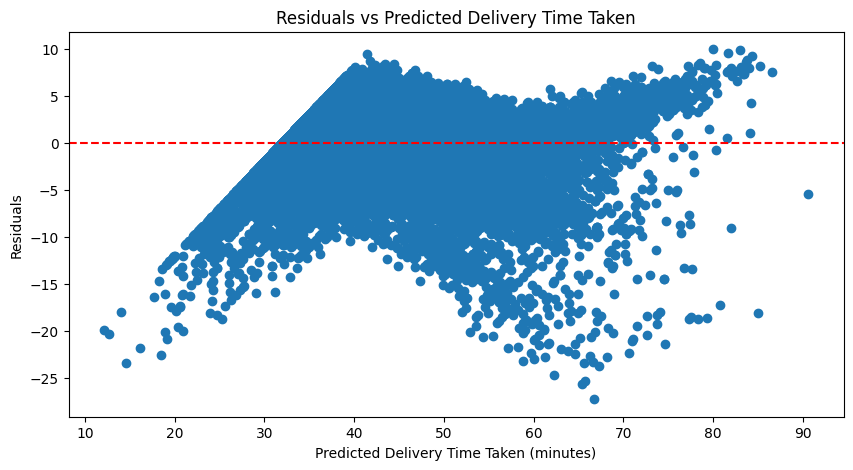

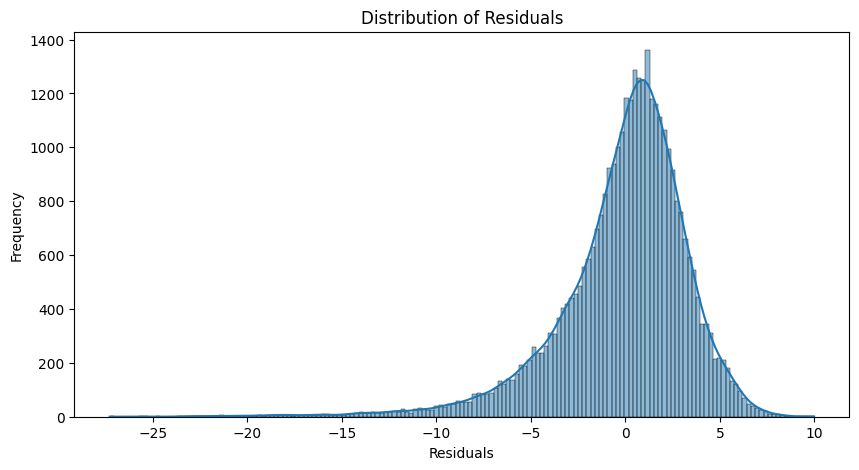

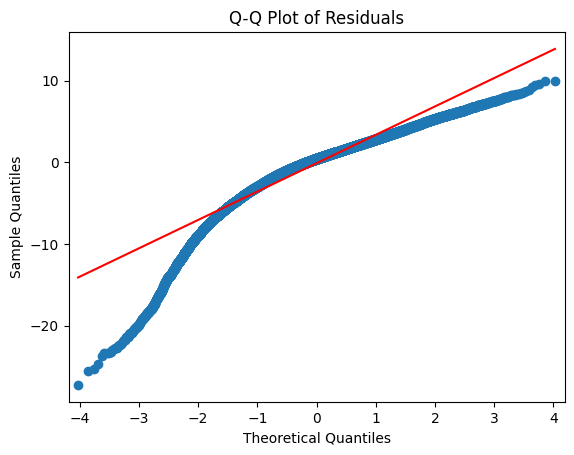

In [102]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
plt.figure(figsize=(10, 5))
plt.scatter(model_predictions, model_predictions - y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Delivery Time Taken (minutes)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Delivery Time Taken')
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(10, 5))
sns.histplot(model_predictions - y_test, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for residuals
sm.qqplot(model_predictions - y_test, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> store_primary_category, order_protocol are category varibales only. SInce they had no effect on the modelling and less correlation, they were removed from the data set.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 means that 20% of the dataset will be used for the test set, and the remaining 80% will be used for the training set when splitting the data — typically using train_test_split() in scikit-learn. This helps evaluate how well the model generalizes to unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> distance has the highest correlation with target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Used the box plots and used IQR method to detect outliers and removed that dont fall in that range



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> distance, total_outstanding orders, subtotal



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the dependent variable \( y \) and the independent variables \( x_1, x_2, ..., x_n \). The model fits a line (or hyperplane in higher dimensions) defined by the equation:

\[
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n
\]

where \( \beta_0 \) is the intercept and \( \beta_1, ..., \beta_n \) are the coefficients.

The algorithm minimizes a cost function, typically the **Mean Squared Error (MSE)**, to find the best-fitting line. Optimization techniques like **Gradient Descent** or the **Normal Equation** are used to estimate the coefficients. Once trained, the model predicts outcomes for new data by applying the learned linear equation.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression models the relationship between one independent variable and one dependent variable using a straight line.
Multiple linear regression involves two or more independent variables to predict a single dependent variable, capturing more complex relationships.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function in linear regression (typically Mean Squared Error) measures how well the model’s predictions match the actual data. It is minimized using optimization algorithms like Gradient Descent, which iteratively adjusts model parameters (weights) to reduce prediction error.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting occurs when a model learns noise and performs well on training data but poorly on unseen data.
Underfitting happens when a model is too simple to capture the underlying pattern, leading to poor performance on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot shows the residuals (difference between actual and predicted values) on the y-axis and the predicted values (or independent variable) on the x-axis. It detects non linearity, checks Homoscedasticity, helps in verifying normlaity of errors.